In [2]:
import numpy as np
import pandas as pd

In [3]:
# 读取鸢尾花数据集  header 参数来指定标题的行， 默认为0  无标题 header=None
data = pd.read_csv(r'iris.csv',header=0)

# 显示前N行数据 默认为5
# data.head()

# 显示末尾N行数据  默认为5
# data.tail()

# 随机抽取一条样本  默认为1
# data.sample()

# 对属性进行映射关系
data['Species'] = data["Species"].map({"setosa":1,"versicolor":2,"virginica":3})

# 删除不需要的列  axis列号  inplace=True 替换当前文件
# data.drop("id",axis=1,inplace=True)

# 查询是否有重复数值
data.duplicated().any()
# 删除重复数值
data.drop_duplicates(inplace=True)

# 查看某个属性的有多少条数据
data["Species"].value_counts()
data

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


In [4]:
class KNN:
    """使用python实现K近邻算法  分类"""
    def __init__(self,k):
        """初始化
        Parameters
        k: 邻居的个数
        """
        self.k = k
        
    def fit(self,X,y):
        """
        训练方法
        Parameters
        X:  类数组类型  形状为：[样本数量：特征数量]
            待训练的样本特征（属性）
        y： 类数组类型  形状为：[样本数量]
            每个样本的目标值（标签）
        """
        # 将X 转换成np.array数组
        self.X = np.asarray(X)
        # 将y转换成np.array数组
        self.y = np.asarray(y)
    def predict(self,X):
        """
        根据参数传递的样本，对样本数据进行预测
        Parameters:
        X:  类数组类型  形状为：[样本数量：特征数量]
            待训练的样本特征（属性）
        
        Returns
        result : 数组类型
            预测的结果
        """
        X = np.asarray(X)
        result = []
        for x in X:
            # 对于测试集中每一个样本，计算与训练集中的素有样本的距离
            dis = np.sqrt(np.sum((x - self.X)**2,axis=1))
            # 返回数组排序 每个元素在原数组中的索引
            idx = dis.argsort()
            # 进行截断，只取前K个元素  【距离最近的K个元素的索引】
            idx = idx[:self.k]
            self.y[idx]
            # 返回数组中每个元素出现的次数  元素必须是非负整数
            count = np.bincount(self.y[idx])
            # 返回np.array 最大元素对应的索引
            # count.argmax()
            result.append(count.argmax())
        return np.asarray(result)

In [11]:
# np 运算
x = np.array([2,2,2])
y = np.array([3,3,3])
x - y
# result = array([-1, -1, -1])

x = np.array([2,2,2])
y = np.array([[3,3,3],[4,4,4]])
x - y
# result = array([[-1, -1, -1],[-2, -2, -2]])

# 求和 指定轴的方向
p = np.sum((x-y)**2,axis = 1)

# 求根号
np.sqrt(p)

array([1.73205081, 3.46410162])

In [12]:
# np 排序
p = np.array([10,-5,20,80])
# sort 对元素进行排序
np.sort(p)  
# sort 对元素的索引进行排序
p.argsort() # 等价 np.argsort(p)

array([1, 0, 2, 3], dtype=int64)

In [13]:
# np.bincount  
a = np.array([1,2,1,3,4,1,2,1])
np.bincount(a)

array([0, 4, 2, 1, 1], dtype=int64)

In [5]:
# 提取每个类别的数据
t0 = data[data['Species'] == 1]
t1 = data[data['Species'] == 2]
t2 = data[data['Species'] == 3]

# 打乱每个类别数据的顺序
t0 = t0.sample(len(t0),random_state=0)
t1 = t1.sample(len(t1),random_state=1)
t2 = t2.sample(len(t2),random_state=2)

# 构造训练集与测试集  并打乱顺序
train_X = pd.concat([t0.iloc[:40,:-1],t1.iloc[:40,:-1],t2.iloc[:40,:-1]],axis=0)
train_y = pd.concat([t0.iloc[:40:,-1],t1.iloc[:40:,-1],t2.iloc[:40:,-1]],axis=0)
test_X = pd.concat([t0.iloc[40:,:-1],t1.iloc[40:,:-1],t2.iloc[40:,:-1]],axis=0)
test_y = pd.concat([t0.iloc[40:,-1],t1.iloc[40:,-1],t2.iloc[40:,-1]],axis=0)
train_X = train_X.sample(len(train_X),random_state=0)
train_y = train_y.sample(len(train_y),random_state=0)
test_X = test_X.sample(len(test_X),random_state=0)
test_y = test_y.sample(len(test_y),random_state=0)


knn = KNN(k=3)
# 训练
knn.fit(train_X,train_y)
# 预测
result = knn.predict(test_X)

display(np.sum(result == test_y))
display(train_X)

30

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
96,97,5.7,2.9,4.2,1.3
127,128,6.1,3.0,4.9,1.8
133,134,6.3,2.8,5.1,1.5
22,23,4.6,3.6,1.0,0.2
102,103,7.1,3.0,5.9,2.1
32,33,5.2,4.1,1.5,0.1
31,32,5.4,3.4,1.5,0.4
33,34,5.5,4.2,1.4,0.2
53,54,5.5,2.3,4.0,1.3
123,124,6.3,2.7,4.9,1.8


In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
# 默认情况下 matplotlib 不支持中文显示， 通过如下设置支持中文
# 设置黑体  支持中文
mpl.rcParams["font.family"] = "SimHei"
# 正常显示负号 ‘-’
mpl.rcParams["axes.unicode_minus"] = False

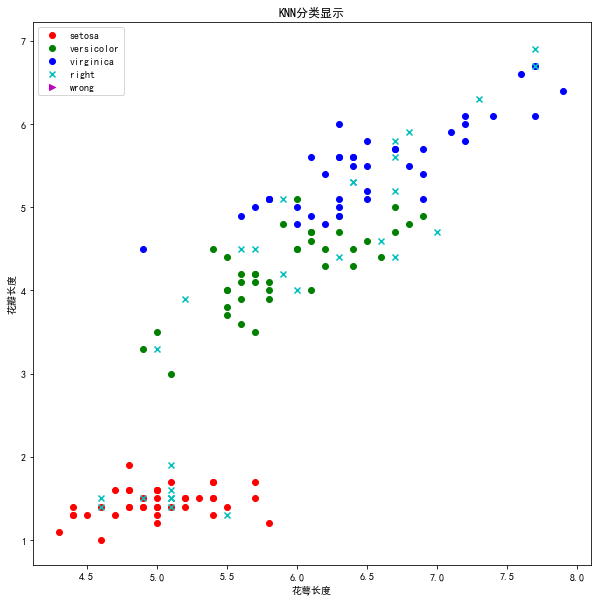

In [50]:
# 设置画布大小
plt.figure(figsize=(10,10))

'({"setosa":1,"versicolor":2,"virginica":3})'
# 绘制训练集
plt.scatter(x=t0['Sepal.Length'][:40],y=t0['Petal.Length'][:40],color='r',label='setosa')
plt.scatter(x=t1['Sepal.Length'][:40],y=t1['Petal.Length'][:40],color='g',label='versicolor')
plt.scatter(x=t2['Sepal.Length'][:40],y=t2['Petal.Length'][:40],color='b',label='virginica')

# 绘制测试集
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right['Sepal.Length'],y=right['Petal.Length'],color='c',marker='x',label='right')
plt.scatter(x=wrong['Sepal.Length'],y=wrong['Petal.Length'],color='m',marker='>',label='wrong')
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('KNN分类显示')
plt.legend(loc='best')
plt.show()